<a href="https://colab.research.google.com/github/MeisamKargar/DataVisualizationWithPython/blob/main/EDA-Covid19_US.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Ingest

In [ ]:
import pandas as pd
df = "https://raw.githubusercontent.com/"\
     "nytimes/covid-19-data/master/us-states.csv"
df = pd.read_csv(df)
df.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


## EDA

In [ ]:
df.describe()

,fips,cases,deaths
count,61942.000000,6.194200e+04,61942.000000
mean,32.247958,8.898301e+05,11779.067499
std,18.788383,1.470231e+06,17345.774849
min,1.000000,1.000000e+00,0.000000
25%,17.000000,7.078350e+04,1171.000000
50%,31.000000,3.514960e+05,5035.000000
75%,46.000000,1.043231e+06,14912.000000
max,78.000000,1.216916e+07,104277.000000


<Axes: xlabel='cases', ylabel='deaths'>

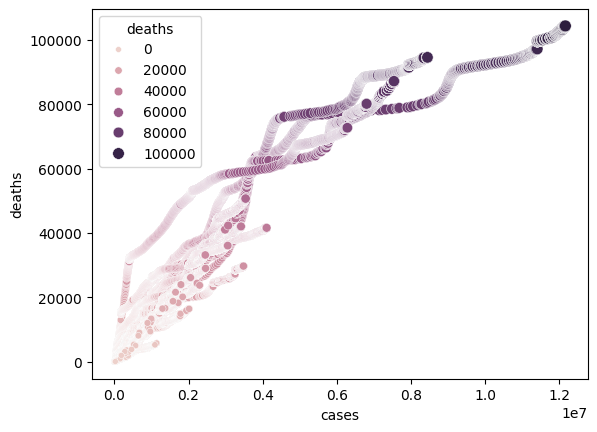

In [ ]:
import seaborn as sns
sns.scatterplot(x="cases", y="deaths", hue="deaths", size="deaths", data=df)

In [ ]:
df = df.set_index('date')
df.head()

,state,fips,cases,deaths
date,,,,
2020-01-21,Washington,53,1,0
2020-01-22,Washington,53,1,0
2020-01-23,Washington,53,1,0
2020-01-24,Illinois,17,1,0
2020-01-24,Washington,53,1,0


In [ ]:
print('Columns: ', df.columns)
df.index

Columns:  Index(['state', 'fips', 'cases', 'deaths'], dtype='object')


Index(['2020-01-21', '2020-01-22', '2020-01-23', '2020-01-24', '2020-01-24',
       '2020-01-25', '2020-01-25', '2020-01-25', '2020-01-26', '2020-01-26',
       ...
       '2023-03-23', '2023-03-23', '2023-03-23', '2023-03-23', '2023-03-23',
       '2023-03-23', '2023-03-23', '2023-03-23', '2023-03-23', '2023-03-23'],
      dtype='object', name='date', length=61942)

In [ ]:
from datetime import date, timedelta

today = date.today()
daybefore = today - timedelta(days = 2)
print (f'today is {today}')
print (f'Two days ago {daybefore}')


today is 2024-08-23
Two days ago 2024-08-21


In [ ]:
df.loc["2020-04-03":"2020-04-05"].head()

,state,fips,cases,deaths
date,,,,
2020-04-03,Alabama,1,1535,38
2020-04-03,Alaska,2,156,2
2020-04-03,Arizona,4,1769,41
2020-04-03,Arkansas,5,738,12
2020-04-03,California,6,12569,282


<ipython-input-13-9448870af9b5>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.loc["2020-04-03":"2020-04-05"]["deaths"], shade=True)


<Axes: xlabel='deaths', ylabel='Density'>

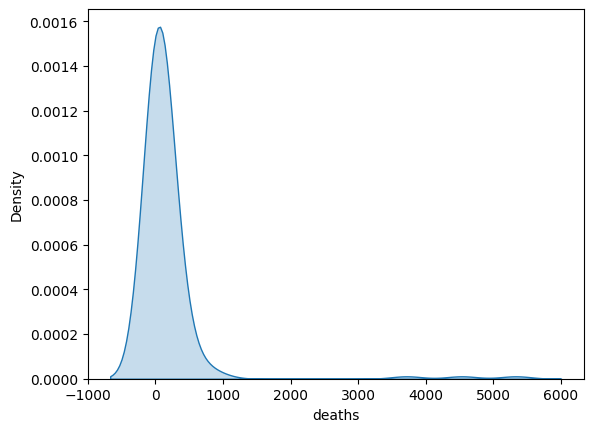

In [ ]:
sns.kdeplot(df.loc["2020-04-03":"2020-04-05"]["deaths"], shade=True)


In [14]:
current_df = df.loc["2020-04-03":"2020-04-05"].sort_values(
  by=["deaths", "cases"], ascending=False)
current_df.head(10)

,state,fips,cases,deaths
date,,,,
2020-04-05,New York,36,124085,5335
2020-04-04,New York,36,115963,4535
2020-04-03,New York,36,103689,3716
2020-04-05,New Jersey,34,37505,917
2020-04-04,New Jersey,34,34124,847
2020-04-03,New Jersey,34,29895,647
2020-04-05,Michigan,26,15633,617
2020-04-04,Michigan,26,14225,541
2020-04-03,Michigan,26,12669,478


In [15]:
top_ten_states = list(current_df["state"].head(10).values)
top_ten_states

['New York',
 'New York',
 'New York',
 'New Jersey',
 'New Jersey',
 'New Jersey',
 'Michigan',
 'Michigan',
 'Michigan',
 'Louisiana']

In [17]:
top_states_df = df[df['state'].isin(top_ten_states)].drop(columns="fips")

In [18]:
set(top_states_df.state.values)


{'Louisiana', 'Michigan', 'New Jersey', 'New York'}

<Figure size 1500x500 with 0 Axes>

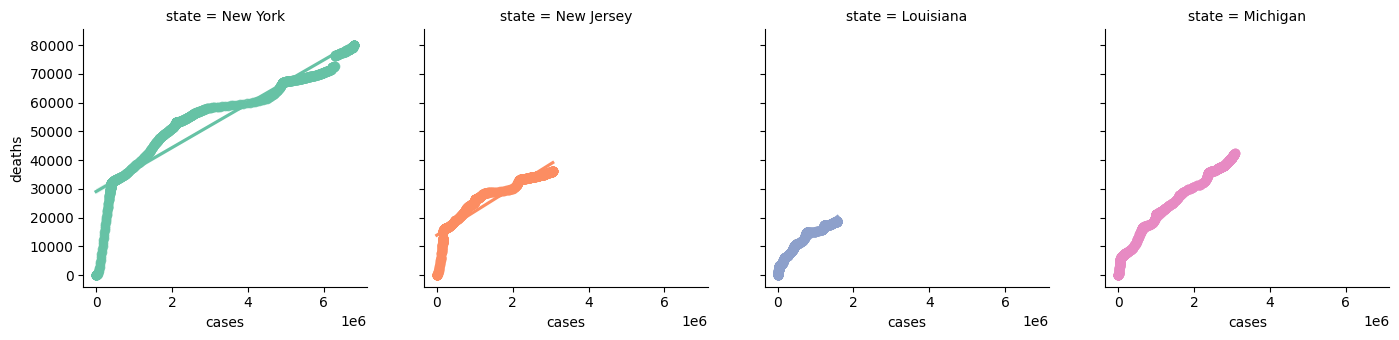

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
ax = sns.lmplot(x="cases", y="deaths",
                    height=3.5,
                    col="state",
                    col_wrap=5,
                    hue="state",
                    palette="Set2",
                    data=top_states_df)
ax.fig.subplots_adjust(wspace=.2)

In [23]:
top_states_march_df = top_states_df.loc["2020-03-08":"2020-04-05"].sort_values(
  by=["deaths", "cases"], ascending=True)
top_states_march_df.head()

,state,cases,deaths
date,,,
2020-03-09,Louisiana,1,0
2020-03-10,Michigan,2,0
2020-03-11,Michigan,2,0
2020-03-08,New Jersey,6,0
2020-03-10,Louisiana,6,0


In [24]:
import plotly.io as pio
pio.renderers.default = 'colab'
import plotly.express as px
fig = px.scatter(
  top_states_march_df,
  x=top_states_march_df.index,
  y="cases", size="deaths", color="state", facet_col="state")
fig.show()

In [37]:
import re
url ="https://raw.githubusercontent.com/"\
     "noahgift/sugar/master/data/education_sugar_cdc_2003.csv"
cdc_2013 = pd.read_csv(url)
cdc_2013.head()
cdc_2013.set_index("State", inplace=True)
for column in cdc_2013.columns:
  # Remove anything enclosed in parentheses and replace dashes with periods
  cdc_2013[column]=cdc_2013[column].str.replace(r"\(.*\)","")
  cdc_2013[column]=cdc_2013[column].str.replace("–",".")
  cdc_2013[column] = cdc_2013[column].str.extract('(\d+\.\d+)').astype(float) # Extract numeric part using regex
cdc_2013.head()
cdc_2013.reset_index(inplace=True)
cdc_2013.rename(
  columns={
      "State": "state",
      "Employed": "employed-sugar-intake-daily"
  },
  inplace=True)
cdc_2013.head()

,state,employed-sugar-intake-daily,Not employed,Retired,<High school,High school,Some college,College graduate
0,Alaska,26.2,32.1,16.0,47.1,34.9,24.2,12.9
1,Arizona,33.0,28.7,13.8,40.4,36.5,24.4,14.6
2,California,22.9,30.2,15.0,38.5,29.9,21.4,11.5
3,Connecticut,18.9,24.3,15.0,27.8,26.9,19.9,10.2
4,District of Columbia,18.5,34.6,18.5,45.6,39.0,28.9,8.4


In [38]:
cdc_employed_df = cdc_2013[["employed-sugar-intake-daily", "state"]]
sugar_covid_df = df.merge(cdc_employed_df, how="inner", on="state")
sugar_covid_df.head()

,state,fips,cases,deaths,employed-sugar-intake-daily
0,California,6,1,0,22.9
1,California,6,2,0,22.9
2,California,6,2,0,22.9
3,California,6,2,0,22.9
4,California,6,2,0,22.9


In [39]:
election_df = pd.read_csv(
  "https://raw.githubusercontent.com/"\
  "paiml/minimal-python/master/data/2016-Electoral-Votes.csv")
election_df.rename(columns={"State": "state"},inplace=True)
election_df.drop(columns="Votes", inplace=True)
election_df = pd.concat(
  [election_df, pd.get_dummies(election_df["Winning Party"])], axis=1)
election_df.head()

,state,Winning Party,Democrats,Republicans
0,Alabama,Republicans,False,True
1,Alaska,Republicans,False,True
2,Arizona,Republicans,False,True
3,Arkansas,Republicans,False,True
4,California,Democrats,True,False


In [44]:
sugar_covid_df = sugar_covid_df.drop('state', axis=1)
sugar_covid_df.corr()


,fips,cases,deaths,employed-sugar-intake-daily
fips,1.000000,-0.117420,-0.125482,0.229021
cases,-0.117420,1.000000,0.935580,-0.127835
deaths,-0.125482,0.935580,1.000000,-0.158014
employed-sugar-intake-daily,0.229021,-0.127835,-0.158014,1.000000


In [45]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Heatmap(
                   z=sugar_covid_df.corr(),
                   x=['cases', 'deaths',
                      'employed-sugar-intake-daily',
                      'Democrats', 'Republicans'],
                   y=['cases', 'deaths',
                      'employed-sugar-intake-daily',
                      'Democrats', 'Republicans'],
                   hoverongaps = False))
fig.show()